차원 축소
- 통계적으로 상관관계가 없도록 데이터셋을 회전하는 기술

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

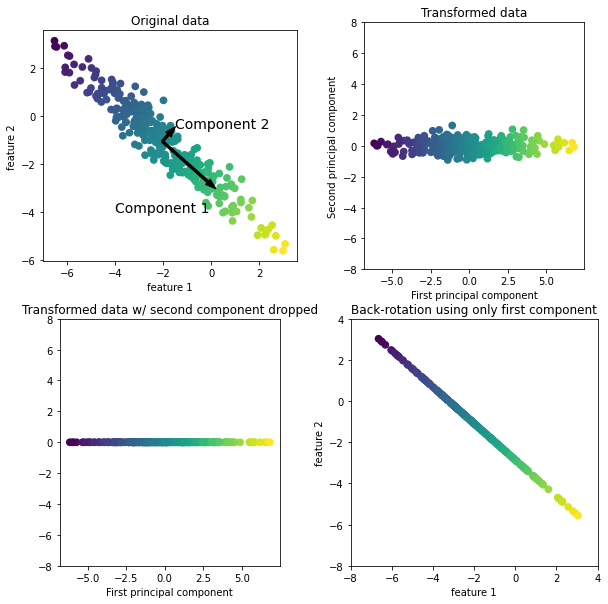

In [2]:
mglearn.plots.plot_pca_illustration()

In [6]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

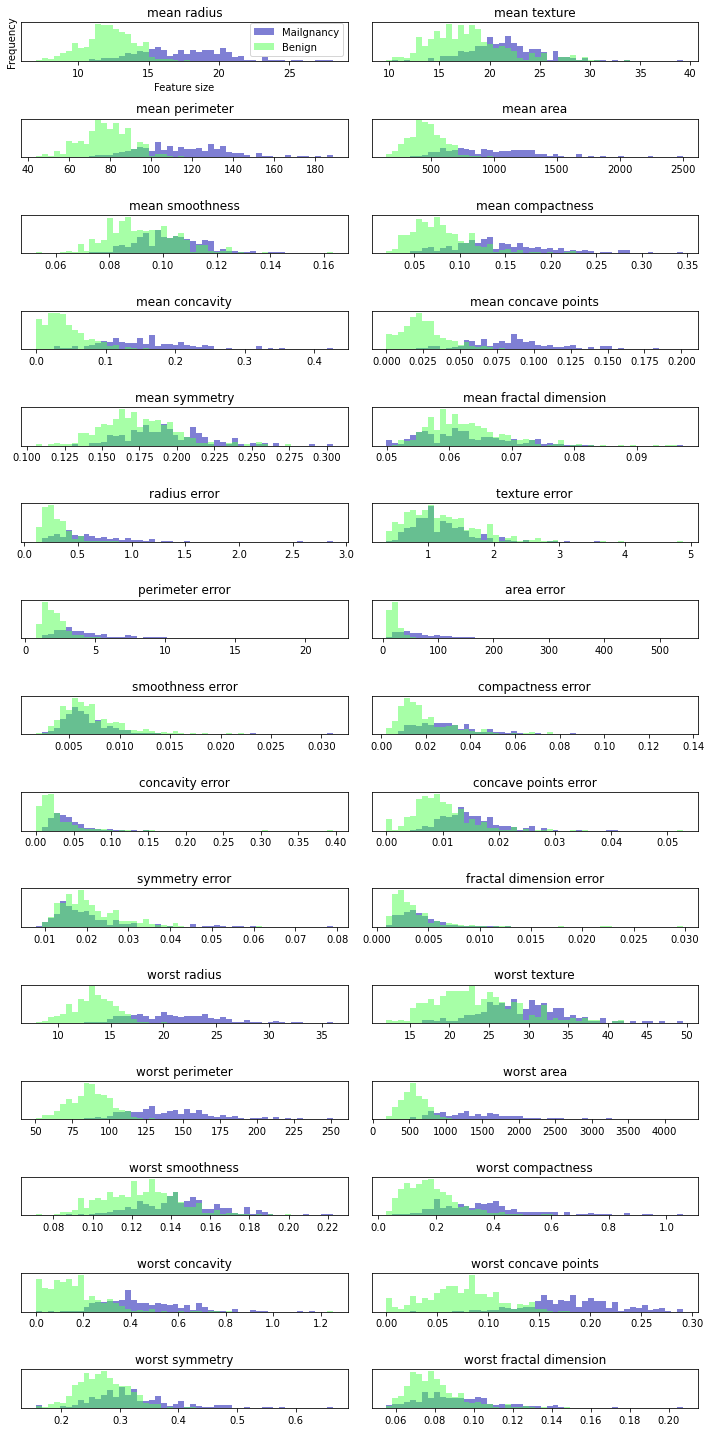

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target==0] # 양성과 음성으로 쪼갬
bengin = cancer.data[cancer.target==1]

ax=axes.ravel() # ravel: data를 평평한 데이터로 만들어주는 효과

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=0.5) # 초록 좋은, 파랑 안좋은
    ax[i].hist(bengin[:,i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature size')
ax[0].set_ylabel('Frequency')
ax[0].legend(['Mailgnancy', 'Benign'], loc='best')
plt.tight_layout()

In [4]:
print(cancer.data.shape)

(569, 30)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
# 변형된 데이터 구하기
x_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2) # 데이터의 처음 2개의 주성분만을 사용
pca.fit(x_scaled) # 변형된 데이터로 학습
# pca 변형데이터 만들기
x_pca = pca.transform(x_scaled)

In [7]:
# 차원 데이터가 2개로 변경되는 것을 확인할 수 있다.
print('원본데이터 shape:', str(x_scaled.shape))
print('축소된 데이터 shape:', str(x_pca.shape))

원본데이터 shape: (569, 30)
축소된 데이터 shape: (569, 2)


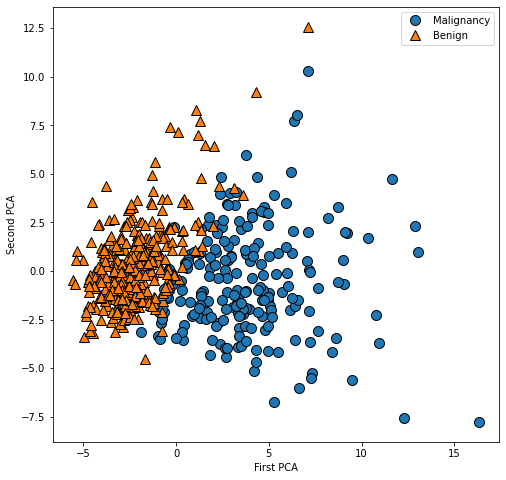

In [8]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], cancer.target)
plt.xlabel('First PCA')
plt.ylabel('Second PCA')
plt.legend(['Malignancy', 'Benign'], loc='best')
plt.show()

In [9]:
print('PCA 주성분 형태:', pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [10]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [11]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape)

(87, 65)


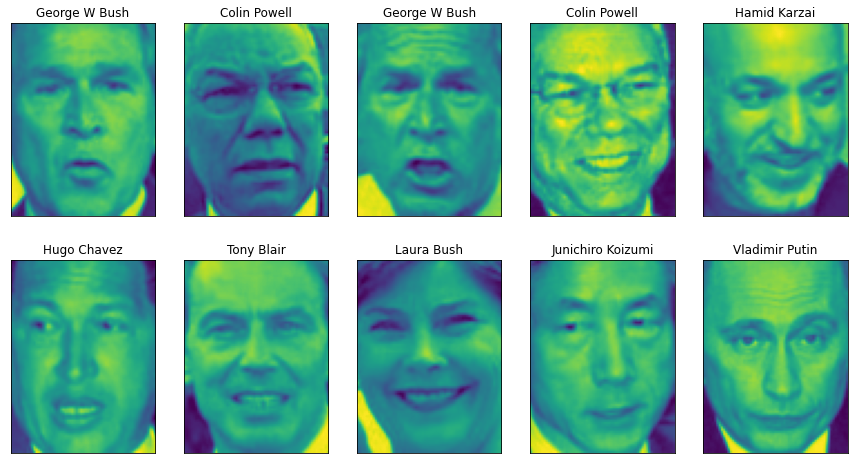

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [13]:
print('people.images.shape:', people.images.shape)
print('클래스 개수:', len(people.target_names))

people.images.shape: (2489, 87, 65)
클래스 개수: 43


In [14]:
people.target[0:10], people.target_names[people.target[0:10]]

(array([11,  7, 11,  7, 15, 17, 40, 28, 26, 42], dtype=int64),
 array(['George W Bush', 'Colin Powell', 'George W Bush', 'Colin Powell',
        'Hamid Karzai', 'Hugo Chavez', 'Tony Blair', 'Laura Bush',
        'Junichiro Koizumi', 'Vladimir Putin'], dtype='<U23'))

In [15]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='  ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Ariel Sharon               77  Atal Bihari Vajpayee       24  
Bill Clinton               29  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Hamid Karzai               22  Hans Blix                  39  Hugo Chavez                71  
Igor Ivanov                20  Jack Straw                 28  Jacques Chirac             52  
Jean Chretien              55  Jennifer Aniston           21  Jennifer Capriati          42  
John Ashcroft              53  Juan Carlos Ferrero        28  Junichiro Koizumi          60  
Kofi Annan                 32  Laura Bush                 41  Lindsay Davenport          22  
Lleyton Hewitt             41  Megawati Sukarnoputri      33

In [16]:
from sklearn.preprocessing import MinMaxScaler

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
x_people = people.data[mask]
y_people = people.target[mask]

# Scaler -> StandardScaler, MIxMaxScaler, (0-1: /255)
x_people = x_people / 255.

scaler = MinMaxScaler()
scaler.fit(x_people)
x_people_scaled = scaler.transform(x_people)

In [17]:
# 255로 나누면 거의 비슷한 크기로 변경이 된다.
print(x_people)
print(x_people_scaled)

[[0.24052288 0.26928103 0.31895426 ... 0.10980392 0.11503268 0.11895425]
 [0.77385616 0.8052287  0.74771243 ... 0.2875817  0.37516338 0.303268  ]
 [0.3830065  0.3986928  0.40392157 ... 0.74509805 0.7542483  0.75947714]
 ...
 [0.27450982 0.29934642 0.34248367 ... 0.06405229 0.07712418 0.07320261]
 [0.24313726 0.2379085  0.20261438 ... 0.7006536  0.6601307  0.6431373 ]
 [0.36732024 0.4130719  0.44705883 ... 0.9490196  0.95816994 0.96732026]]
[[0.24146982 0.26806834 0.3188406  ... 0.10980392 0.11503268 0.11895425]
 [0.77690285 0.8068331  0.7509881  ... 0.2875817  0.37516338 0.303268  ]
 [0.38451442 0.3981603  0.4044796  ... 0.74509805 0.7542483  0.75947714]
 ...
 [0.27559057 0.29829174 0.342556   ... 0.06405229 0.07712418 0.07320261]
 [0.24409449 0.2365309  0.20158103 ... 0.7006536  0.6601307  0.6431373 ]
 [0.36876637 0.412615   0.44795784 ... 0.9490196  0.95816994 0.96732026]]


In [18]:
# k-nn (Nearest Neighbor)
# 분류하려고 하는 얼굴과 가장 비슷한 특징을 가진 얼굴의 이미지를 1-nn(최근접 이웃 분류) 이용

from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
print('1-최근접 이웃의 테스트의 점쉬 {:.3f}'.format(knn.score(x_test, y_test)))

1-최근접 이웃의 테스트의 점쉬 0.266


In [19]:
pca = PCA(n_components=100, whiten=True, random_state=0) # Whiten -> 입력값을 비상간 관계로 만드는 것
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print('x_train_pca.shape: ',x_train.shape)
print('x_train_pca.shape: ',x_train_pca.shape)

x_train_pca.shape:  (1146, 5655)
x_train_pca.shape:  (1146, 100)


In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_pca, y_train)
print('1-최근접 이웃의 테스트의 점쉬 {:.3f}'.format(knn.score(x_test_pca, y_test)))

1-최근접 이웃의 테스트의 점쉬 0.376


In [21]:
print('pca.components_.shape: ', pca.components_.shape)

pca.components_.shape:  (100, 5655)


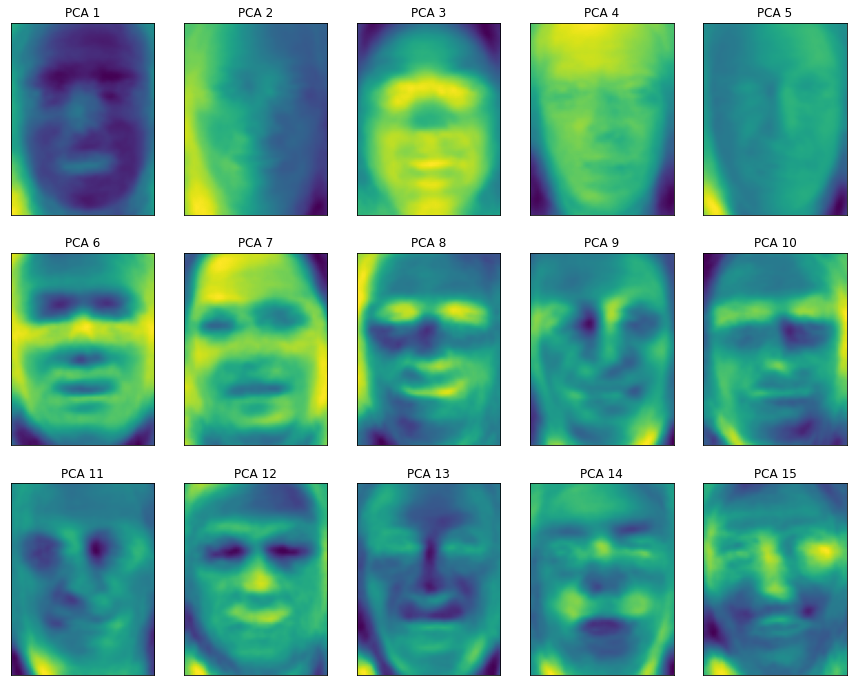

In [22]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('PCA {}'.format((i+1)))

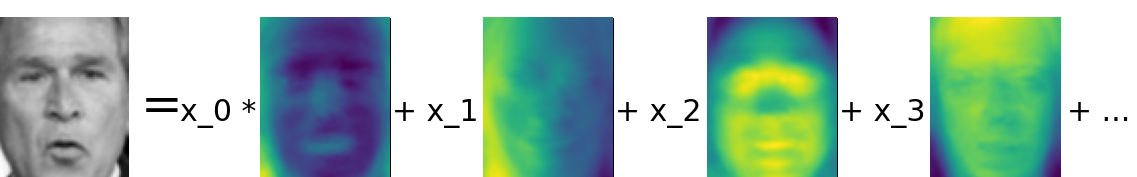

In [23]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap='gray')
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2, cmap='viridis')
    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4 ), pad=0.0, xycoords='data')
    ax.add_artist(ab)
    
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i), fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 50})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

In [24]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()

In [25]:
x = iris.data
y = iris.target
target_names = iris.target_names

print(x.shape)
print(y.shape)
print(target_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']


In [26]:
pca = PCA(n_components = 2)
x_pca = pca.fit(x).transform(x) # fit와 trans를 한번에

print('First two components: %s' % str(pca.explained_variance_ratio_))

First two components: [0.92461872 0.05306648]


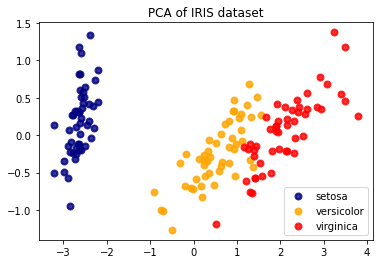

In [27]:
plt.figure()
colors = ['navy','orange','red']
lw = 2

for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
    
plt.legend(loc='best')
plt.title('PCA of IRIS dataset')
plt.show()

# *NMF*

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.827451, ..., 0.168627],
       ...,
       [0.447059, ..., 0.79085 ]], dtype=float32), 
array([[0.909804, ..., 0.484967],
       ...,
       [0.607843, ..., 0.820915]], dtype=float32))


C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reach

______________________________________________________nmf_faces - 588.8s, 9.8min


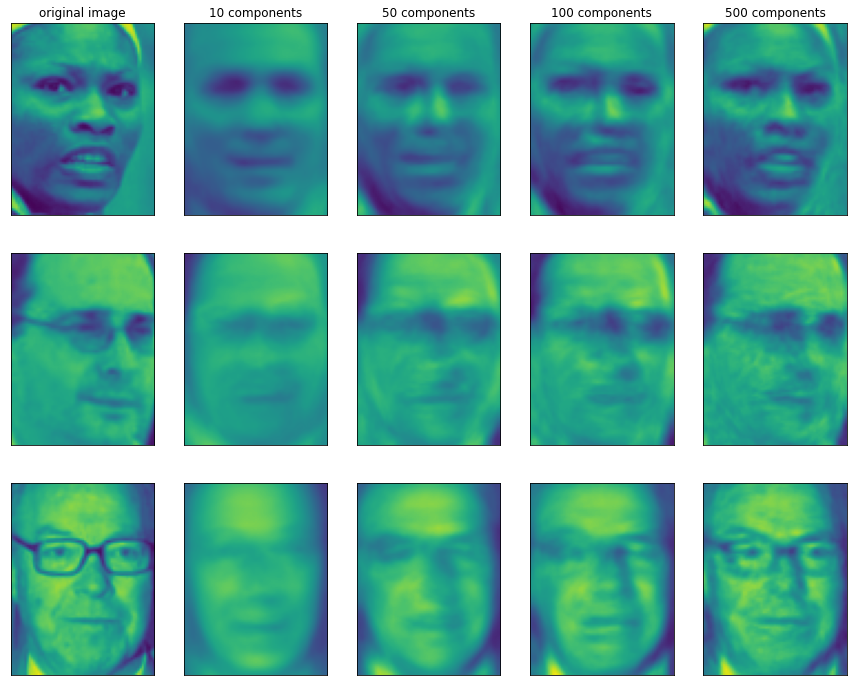

In [29]:
mglearn.plots.plot_nmf_faces(x_train, x_test, image_shape)